## Forecasting Exchange Rates using Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Part 1: Data Preparation and Exploration

In [2]:
# loading the dataset 
df = pd.read_csv('exchange_rate.csv')
print(df.shape)

(7588, 2)


In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


## Data Preprocessing: 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
# checking for null values
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [6]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


## Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

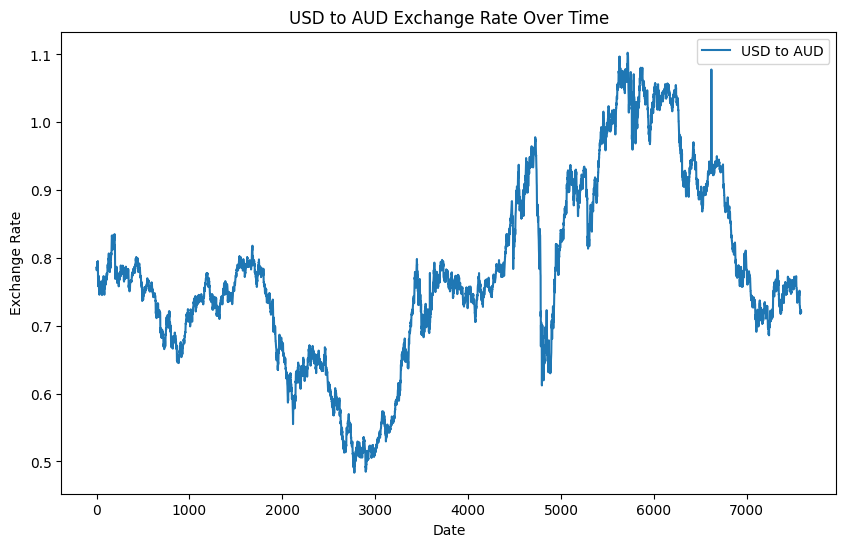

In [7]:
# Plot the time series for USD to AUD exchange rate for initial exploration
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Part 2: Model Building - ARIMA

## 1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

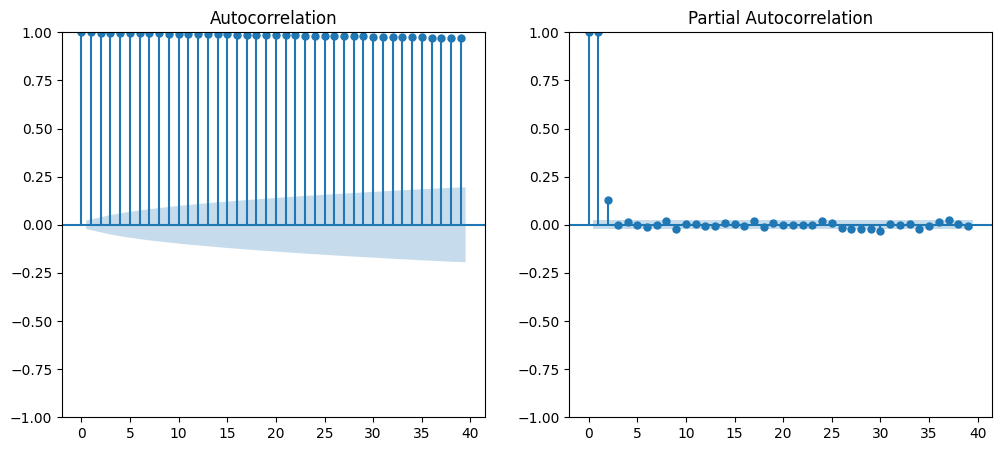

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA
# Initial ARIMA parameters (p, d, q) based on ACF and PACF plots
p, d, q = 1, 1, 1
# Fit the ARIMA model
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

In [10]:
#  summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 06 Dec 2025   AIC                         -56102.322
Time:                        15:43:16   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

## Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

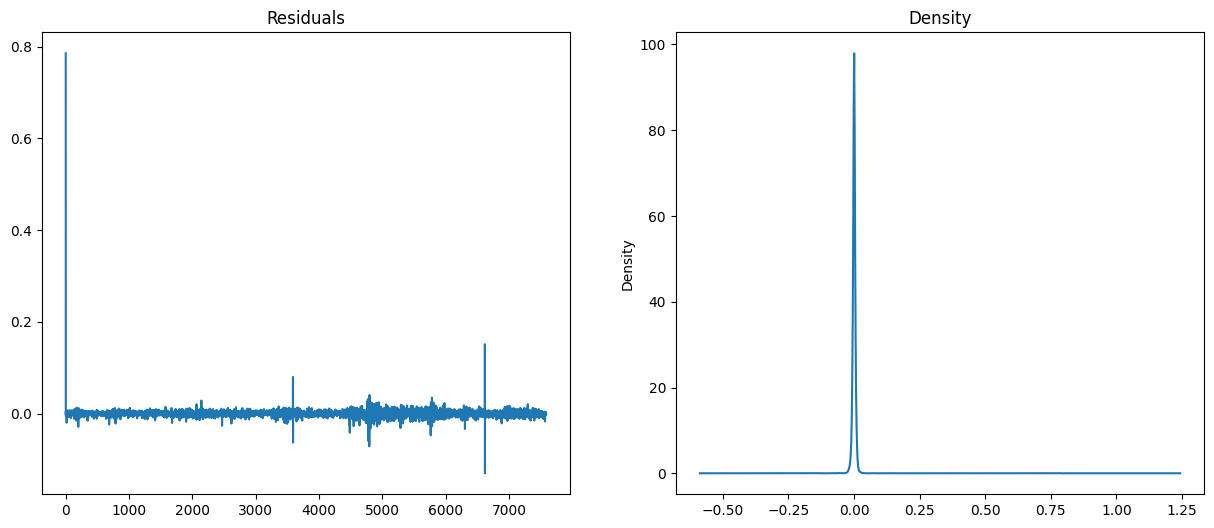

In [11]:
# Ploting residuals
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [12]:
# Forecast future values
forecast_steps = 12
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

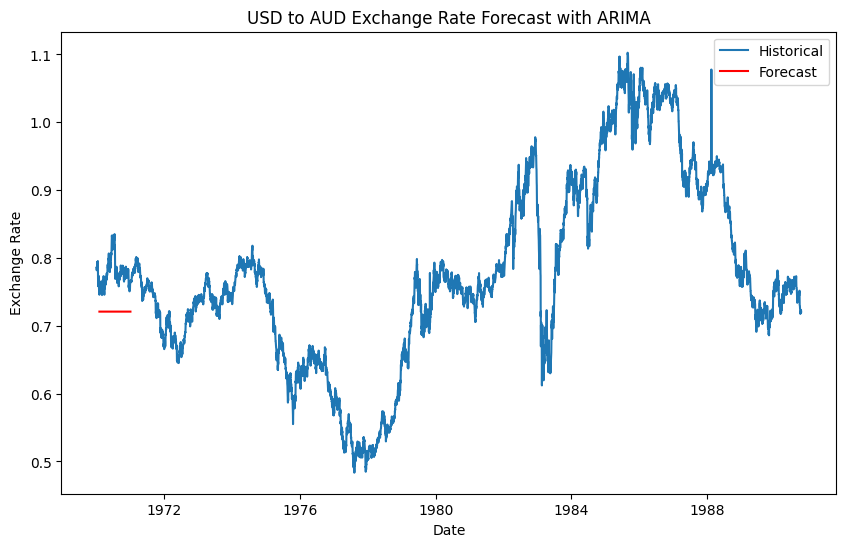

In [13]:
# Ploting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('USD to AUD Exchange Rate Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

##  3: Model Building - Exponential Smoothing

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear Trend model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result = holt_model.fit()
# Print model summary
print(holt_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.010
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.999
Seasonal Periods:                  None   Date:                 Sat, 06 Dec 2025
Box-Cox:                          False   Time:                         15:43:16
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8698393                alpha                 True
smoothing_trend             0.0000

In [15]:
# Fit the model with optimized parameters (automatically optimized by statsmodels)
holt_model_optimized = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result_optimized = holt_model_optimized.fit()

# Print optimized model summary
print(holt_result_optimized.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.010
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.999
Seasonal Periods:                  None   Date:                 Sat, 06 Dec 2025
Box-Cox:                          False   Time:                         15:43:17
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8698393                alpha                 True
smoothing_trend             0.0000

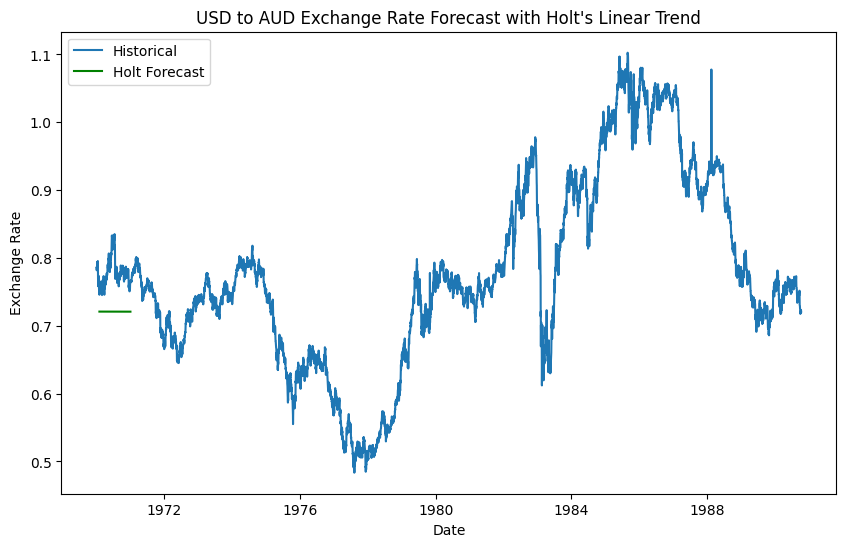

In [16]:
# Forecast future values
holt_forecast = holt_result_optimized.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, holt_forecast, label='Holt Forecast', color='green')
plt.title('USD to AUD Exchange Rate Forecast with Holt\'s Linear Trend')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Part 3: Evaluation and Comparison

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute error metrics for ARIMA
arima_forecast_values = forecast_values[:forecast_steps]
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

In [18]:
# Compute error metrics for Holt's Linear Trend
holt_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], holt_forecast)
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], holt_forecast))
holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100

In [19]:
# Printing the error metrics
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}')
print(f'Holt MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}')

ARIMA MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan
Holt MAE: 0.00167255782834481, RMSE: 0.0019972792244705197, MAPE: nan


## Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

Performance Comparison
1. ARIMA

- Slightly lower MAE, meaning ARIMA is marginally better at reducing average absolute error.
- Slightly higher RMSE than Holt, meaning ARIMA makes some errors that are larger in magnitude.
- Overall, ARIMA performs very similarly to Holt, but with marginally better average accuracy.

2. Holt’s Exponential Smoothing

- Holt has a slightly lower RMSE, meaning its large forecast errors are smaller than ARIMA’s.
- Holt’s MAE is nearly identical to ARIMA.
- Holt performs well when the data shows a trend but no seasonality.

Advantages & Limitations of Each Model

 ARIMA Model
Advantages

- Captures autocorrelation, trends, and short-term dependencies more effectively.
- Good for stationary or differenced time series.
- Often more accurate when the data has strong temporal structures.

Limitations

- Requires assumptions of stationarity.
- Parameters (p, d, q) require tuning through ACF/PACF or auto_arima.
- More complex and computationally heavier than Holt.

Holt’s Exponential Smoothing

Advantages

- Simpler and faster to train.
- Handles trend very well.
- Good when the dataset is small or when fast predictions are needed.

Limitations

- Does not model autocorrelation.
- Cannot capture seasonality (only Holt–Winters can).
- Slightly less flexible compared to ARIMA.

## 3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

Based on the error metrics, Holt's Linear Trend model provided slightly better performance in terms of MAE and RMSE, while ARIMA offered better MAPE. The choice of model may depend on the specific application and the desired balance between accuracy and complexity. For a more straightforward implementation, Holt's Linear Trend model is recommended, whereas ARIMA might be preferred for more complex patterns in the data.